<h2>Capstone Project - The Battle of the Neighborhoods (Week 2)</h2>

<h4><br> Applied Data Science Capstone by IBM/Coursera </h4>

<h4>Business Problem</h4>

Toronto is the most populous city in Canada and it is recognized as one of the most multicultural and cosmopolitan cities in the world, so there are different restaurants. We want to help stakeholders interested in opening sea food restaurant to find best place in Toronto. We try to find locations are lack of sea food restaurant or already crowded with restaurants.

<h4>Data</h4>

Following data sources will be needed to extract/generate the required information:
Scrape the Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,
we can get postal codes, boroughs, neighborhoods in Toronto.
We need the latitude and longitude of each borough, for this reason, a link to a CSV file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data.
Finding restaurants in each neighborhood of Toronto using Foursquare API.
We need to analyze the population and income distribution of each neighborhood, so, we get this data 
from  https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue 



<h4>Toronto neighborhood data</h4>


In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
%matplotlib inline

In [2]:
# Web Scraping and extract data from wikipedia in toronto_neighborhood.ipynb and save as pickle and load here
Toronto_neighborhood=np.load("Toronto_neighborhood.pickle",allow_pickle=True)
Toronto_neighborhood

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [3]:
#Population & Ethnic Distribution, and incom distribution of Each Neighborhood 
toronto_neighborhood_profile=pd.read_csv('toronto_neighborhood_profile.csv')
toronto_neighborhood_profile=toronto_neighborhood_profile.drop(['Borough'],axis=1)
toronto_neighborhood_profile

,PostalCode,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999",...,"$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over"
0,M1B,263,90290,6208,45.74,26825,290,240,420,720,...,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300
1,M1C,134,12494,2403,5.20,3700,60,25,45,60,...,230,230,200,195,210,1890,490,410,550,440
2,M1E,411,54764,8570,19.04,19855,315,540,815,970,...,1565,1360,1255,1140,1050,5570,1970,1320,1390,915
3,M1G,137,53485,4345,12.31,18445,435,455,685,1170,...,1725,1405,1240,1070,865,3980,1660,1030,855,430
4,M1H,127,29960,4011,7.47,10765,615,220,255,450,...,935,845,765,615,575,2625,1015,700,635,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,M9M,23,10722,2547,4.21,3715,45,45,50,80,...,285,285,240,240,250,1355,470,335,355,190
84,M9N,113,17992,7197,2.50,7595,150,265,465,670,...,615,510,425,310,295,1360,570,315,305,175
85,M9P,108,14257,7791,1.83,5730,105,135,190,290,...,470,430,415,370,315,1375,545,335,325,165
86,M9R,10,32529,8585,7.54,11635,185,190,310,480,...,1100,930,795,660,625,2915,1080,710,695,425


In [4]:
CLIENT_ID= '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [5]:
# define a function to find all neighbors of toronto
def getNearbyVenues(boroughs,codes,names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for borough,code,name, lat, lng in zip(boroughs,codes,names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            code,
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode','Borough', 'Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(  boroughs=Toronto_neighborhood['Borough'],
                                   codes=Toronto_neighborhood['PostalCode'],
                                   names=Toronto_neighborhood['Neighbourhood'],
                                   latitudes=Toronto_neighborhood['Latitude'],
                                   longitudes=Toronto_neighborhood['Longitude'])
                                  

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [6]:
toronto_venues.groupby('Neighbourhood').count()


,PostalCode,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,,
Agincourt,100,100,100,100,100,100,100,100
"Alderwood, Long Branch",100,100,100,100,100,100,100,100
"Bathurst Manor, Wilson Heights, Downsview North",55,55,55,55,55,55,55,55
Bayview Village,49,49,49,49,49,49,49,49
"Bedford Park, Lawrence Manor East",100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...
"Willowdale, Willowdale West",54,54,54,54,54,54,54,54
Woburn,65,65,65,65,65,65,65,65
Woodbine Heights,96,96,96,96,96,96,96,96


In [7]:
toronto_venues

,PostalCode,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,North York,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,M3A,North York,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café
2,M3A,North York,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
3,M3A,North York,Parkwoods,43.753259,-79.329656,LCBO,43.757774,-79.314257,Liquor Store
4,M3A,North York,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket
...,...,...,...,...,...,...,...,...,...
8562,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Chodang Soon Tofu,43.644062,-79.533144,Korean Restaurant
8563,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Milestones,43.623197,-79.515430,Restaurant
8564,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Second Cup,43.645331,-79.522753,Coffee Shop
8565,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Thai Express,43.645427,-79.522446,Restaurant


In [8]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Borough'] = toronto_venues['Borough'] 
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 
toronto_onehot['PostalCode'] = toronto_venues['PostalCode']
toronto_onehot['Latitude'] = toronto_venues['Neighbourhood Latitude']
toronto_onehot['Longitude'] = toronto_venues['Neighbourhood Longitude']  
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Longitude,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit,Borough,Neighbourhood,PostalCode,Latitude
0,-79.329656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,North York,Parkwoods,M3A,43.753259
1,-79.329656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,North York,Parkwoods,M3A,43.753259
2,-79.329656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,North York,Parkwoods,M3A,43.753259
3,-79.329656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,North York,Parkwoods,M3A,43.753259
4,-79.329656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,North York,Parkwoods,M3A,43.753259


In [9]:
venues_grouped = toronto_onehot.groupby(['PostalCode','Borough','Neighbourhood','Latitude','Longitude']).sum().reset_index()
venues_grouped

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,15
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,0,0,0,2,...,0,0,0,0,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,0,0,0,0,1,...,0,0,0,0,2,0,0,0,0,0
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# keep just restaurants in toronto
total_restaurant=venues_grouped.filter(regex='Restaurant$',axis=1).sum(axis=1)
data = {"PostalCode":venues_grouped['PostalCode'],"Borough": venues_grouped['Borough'],"Neighbourhood":venues_grouped['Neighbourhood'], 
        "Latitude":venues_grouped['Latitude'] ,"Longitude":venues_grouped['Longitude'],
        "total_restaurant":total_restaurant,"Seafood_restaurant":venues_grouped['Seafood Restaurant']}
toronto_restaurant= pd.DataFrame(data)
toronto_restaurant.dropna()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,total_restaurant,Seafood_restaurant
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,9,0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,6,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,16,0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,25,0
...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,10,0
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,5,0
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,11,0
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437,12,0


In [11]:
Toronto_restaurants_info= pd.merge(toronto_restaurant, toronto_neighborhood_profile, how="left", on=["PostalCode"])
Toronto_restaurants_info=Toronto_restaurants_info.dropna()
Toronto_restaurants_info.rename(columns={"  Under $5,000": "-5k", "  $5,000 to $9,999":"5-10k","  $10,000 to $14,999":"10-15k",
                                         "  $15,000 to $19,999":"15-20k","  $20,000 to $24,999":"20-25k","  $25,000 to $29,999":"25-30k",
                                         "  $30,000 to $34,999":"30-35k","  $35,000 to $39,999":"35-40k","  $40,000 to $44,999":"40-45k",
                                         "  $45,000 to $49,999":"45-50k","  $50,000 to $59,999":"50-60k","  $60,000 to $69,999":"60-70k",
                                         "  $70,000 to $79,999":"70-80k","  $80,000 to $89,999":"80-90k","  $90,000 to $99,999":"90-100k",
                                         "  $100,000 and over":"+100k","    $100,000 to $124,999":"100-125k","    $125,000 to $149,999":"125-150k",
                                         "    $150,000 to $199,999":"150-200k","    $200,000 and over":"+200k"},inplace = True)
Toronto_restaurants_info

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,total_restaurant,Seafood_restaurant,Neighbourhood Number,"Population, 2016",Population density per square kilometre,...,50-60k,60-70k,70-80k,80-90k,90-100k,+100k,100-125k,125-150k,150-200k,+200k
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,9,0,263.0,90290.0,6208.0,...,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4,0,134.0,12494.0,2403.0,...,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,6,0,411.0,54764.0,8570.0,...,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,16,0,137.0,53485.0,4345.0,...,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,25,0,127.0,29960.0,4011.0,...,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M9M,North York,"Humberlea, Emery",43.724766,-79.532242,5,0,23.0,10722.0,2547.0,...,285.0,285.0,240.0,240.0,250.0,1355.0,470.0,335.0,355.0,190.0
99,M9N,York,Weston,43.706876,-79.518188,10,0,113.0,17992.0,7197.0,...,615.0,510.0,425.0,310.0,295.0,1360.0,570.0,315.0,305.0,175.0
100,M9P,Etobicoke,Westmount,43.696319,-79.532242,5,0,108.0,14257.0,7791.0,...,470.0,430.0,415.0,370.0,315.0,1375.0,545.0,335.0,325.0,165.0
101,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724,11,0,10.0,32529.0,8585.0,...,1100.0,930.0,795.0,660.0,625.0,2915.0,1080.0,710.0,695.0,425.0


In [12]:

new_data={'PostalCode':Toronto_restaurants_info['PostalCode'],'-5k':Toronto_restaurants_info['-5k'],
                '5-10k':Toronto_restaurants_info['5-10k'],'10-15k':Toronto_restaurants_info['10-15k'],
                '15-20k':Toronto_restaurants_info['15-20k'],'20-25k':Toronto_restaurants_info['20-25k'],
                '25-30k':Toronto_restaurants_info['25-30k'],'30-35k':Toronto_restaurants_info['30-35k'],
                '35-40k':Toronto_restaurants_info['35-40k'],'40-45k':Toronto_restaurants_info['40-45k'],
                '45-50k':Toronto_restaurants_info['45-50k'],'50-60k':Toronto_restaurants_info['50-60k'],
                '60-70k':Toronto_restaurants_info['60-70k'],'70-80k':Toronto_restaurants_info['70-80k'],
                '80-90k':Toronto_restaurants_info['80-90k'],'90-100k':Toronto_restaurants_info['90-100k'],
                '+100k':Toronto_restaurants_info['+100k'],'100-125k':Toronto_restaurants_info['100-125k'],
                '125-150k':Toronto_restaurants_info['125-150k'],'150-200k':Toronto_restaurants_info['150-200k'],
                '+200k':Toronto_restaurants_info['+200k'] }
df=pd.DataFrame(new_data)
df.set_index('PostalCode',inplace=True)
df = df.stack().reset_index()
income_distribution=df.rename(columns={'level_1':'income_level',0:'count'})

In [13]:
Toronto_nodummy=Toronto_restaurants_info.iloc[:,0:9]
region_income=pd.merge(Toronto_nodummy, income_distribution, how="left", on=["PostalCode"])

In [14]:
region_income['count/population'] = round((region_income['count']/region_income['Population, 2016'])*100,2)
region_income=region_income[['PostalCode','Borough','income_level','Population, 2016','count/population']]
region_income

,PostalCode,Borough,income_level,"Population, 2016",count/population
0,M1B,Scarborough,-5k,90290.0,0.32
1,M1B,Scarborough,5-10k,90290.0,0.27
2,M1B,Scarborough,10-15k,90290.0,0.47
3,M1B,Scarborough,15-20k,90290.0,0.80
4,M1B,Scarborough,20-25k,90290.0,0.81
...,...,...,...,...,...
1795,M9V,Etobicoke,+100k,65924.0,7.90
1796,M9V,Etobicoke,100-125k,65924.0,2.94
1797,M9V,Etobicoke,125-150k,65924.0,1.88
1798,M9V,Etobicoke,150-200k,65924.0,1.71


In [15]:
Toronto_seafood=Toronto_restaurants_info[["Borough","Neighbourhood","Seafood_restaurant","Latitude","Longitude"]].where(Toronto_restaurants_info["Seafood_restaurant"] !=0).dropna()
Toronto_seafood

,Borough,Neighbourhood,Seafood_restaurant,Latitude,Longitude
5,Scarborough,Scarborough Village,1.0,43.744734,-79.239476
8,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",1.0,43.716316,-79.239476
10,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",1.0,43.757410,-79.273304
11,Scarborough,"Wexford, Maryvale",1.0,43.750072,-79.295849
12,Scarborough,Agincourt,1.0,43.794200,-79.262029
13,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",2.0,43.781638,-79.304302
18,North York,"Fairview, Henry Farm, Oriole",1.0,43.778517,-79.346556
21,North York,"Willowdale, Newtonbrook",1.0,43.789053,-79.408493
22,North York,"Willowdale, Willowdale East",1.0,43.770120,-79.408493
25,North York,Parkwoods,1.0,43.753259,-79.329656


<h4> Methodology </h4>

The first step in this project is processing data and keep the required data to find the all reastuarnts in toronto.
We want to find the best place to set up a seafood restaurant. So we need to explore and analyze the neighborhood in toronto that is lack of seafood restaurant and also we need to analyze the population and income distribution in Toronto neighborhood.


<h5> Create a map to visualize the location of seafood restaurants in Toronto </h5>

<h5> Visualize the dense of restaurants in Toronto </h5>

In [16]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import numpy as np
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

In [17]:
address = 'Toronto'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [18]:
# create map of toronto using latitude and longitude values
map_all_restaurants = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_restaurant['Latitude'], toronto_restaurant['Longitude'],toronto_restaurant['Borough'], toronto_restaurant['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_restaurants)  
    
map_all_restaurants

<h5> Visualize the dense of seafood restaurants in Toronto </h5>

In [20]:
# create map of toronto using latitude and longitude values
map_seafood_restaurant = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto_seafood['Latitude'], Toronto_seafood['Longitude'],Toronto_seafood['Borough'], Toronto_seafood['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seafood_restaurant)  
    
map_seafood_restaurant

<h5> Analysis </h5>

considering the distribution of seafood restaurants in above maps,in some boroughs close to the water, is lack of seafood restaurants. We should investigate the income distribution to decide where region can be suitable for starting seafood restaraunt.

In [232]:
borough=region_income.Borough.unique()
borough

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

C:\Users\shirani\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


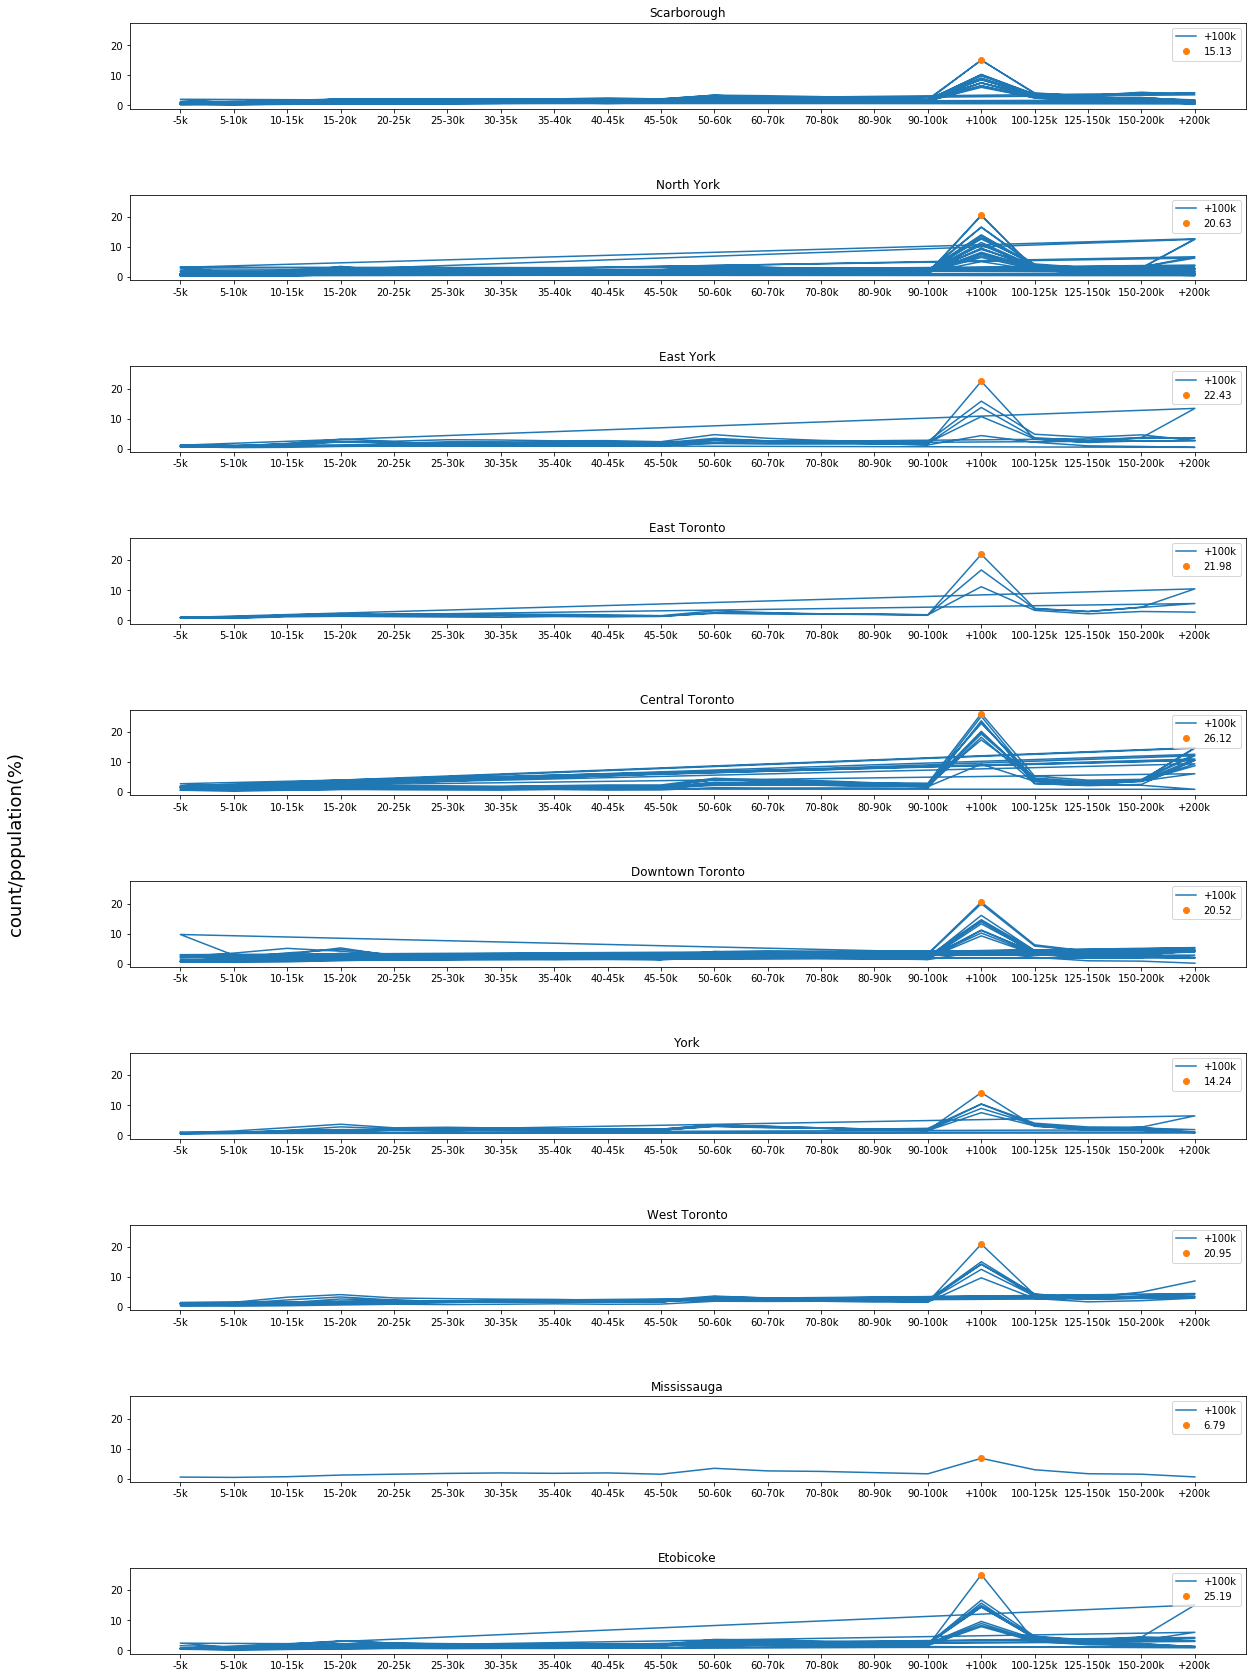

In [263]:
fig,ax=plt.subplots(10,sharey=True,figsize=(20,30))
fig.text(0.04, 0.5, 'count/population(%)', va='center', rotation='vertical',fontsize=18)
for idx,value in enumerate(borough):
    x=region_income['income_level'].where(region_income['Borough']==value).dropna()
    y=region_income['count/population'].where(region_income['Borough']==value).dropna()
    ax[idx].plot(x,y)
    ax[idx].set_title(value)
    n_max = y.argmax()
    ax[idx].plot(x[n_max],y[n_max],'o')
    ax[idx].legend((str(x[n_max]),str(y[n_max])),loc="upper right")

fig.subplots_adjust(hspace=1)
plt.show()

according to the above results, shows that in 'Etobicoke' and 'central toronto', and 'East york' boroughs respectively, 
the income of more than 100k is higher than other boroughs in compare to their population. So, we filter the regions
and do further analysis on these three boroughs.

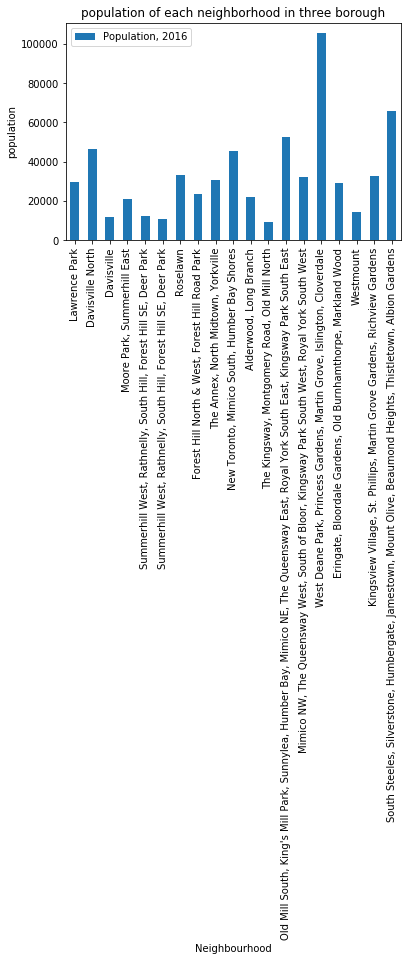

In [21]:
borough=['Etobicoke','Central Toronto','Eeast york']
boroughs_pop= Toronto_restaurants_info[Toronto_restaurants_info.Borough.isin(borough)]
# region1_pop=Toronto_restaurants_info.where((toronto_restaurant['Borough']'Etobicoke'Central Toronto') or (toronto_restaurant['Borough']=='East york') ).dropna()
ax2= boroughs_pop.plot(x='Neighbourhood',y=['Population, 2016'],kind='bar',title='population of each neighborhood in three borough')
ax2.set_ylabel('population')
plt.show()

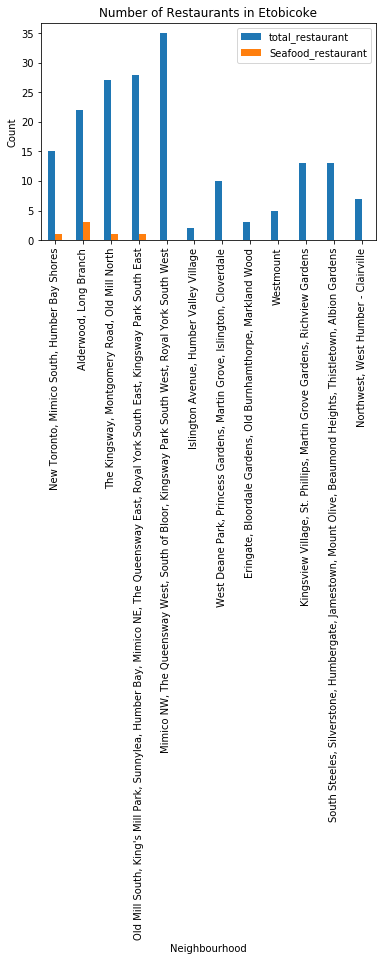

In [295]:
region1=toronto_restaurant.where(toronto_restaurant['Borough']=='Etobicoke').dropna()
ax= region1.plot(x='Neighbourhood',y=['total_restaurant','Seafood_restaurant'],kind='bar',title='Number of Restaurants in Etobicoke')
ax.set_ylabel('Count')
plt.show()

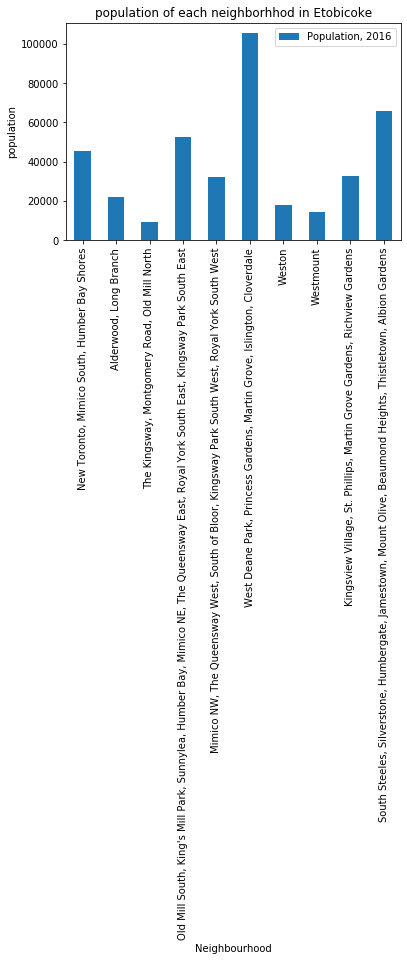

In [296]:
region1_pop=Toronto_restaurants_info.where(toronto_restaurant['Borough']=='Etobicoke').dropna()
ax2= region1_pop.plot(x='Neighbourhood',y=['Population, 2016'],kind='bar',title='population of each neighborhhod in Etobicoke')
ax2.set_ylabel('population')
plt.show()

lets see the distribution of seafood restaurants in the neighborhood of this borough